### Adeline Makokha
### 191199
### DSA 8302 Computational Techniques for Data Science
### Assignment 6

### 1. Graphical Method (2 variables)
Question: A small workshop makes two types of furniture: chairs and tables. Each chair requires 2 hours of carpentry and 1 hour of painting. Each table requires 1 hour of carpentry and 1 hour of painting. The workshop has 6 hours of carpentry time and 4 hours of painting time available each day. Each chair gives a profit of $30, and each table gives a profit of $20.
Task:
•
Formulate the problem as a linear program.
•
Plot the feasible region and determine the optimal number of chairs and tables to maximize profit using a graphical method.
}

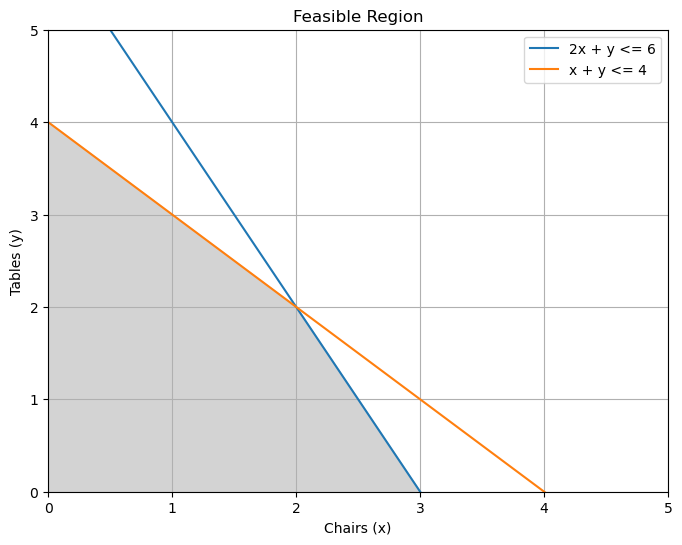

Point (0, 0) gives profit $0
Point (0, 4) gives profit $80
Point (2, 2) gives profit $100
Point (3, 0) gives profit $90


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define constraints
x = np.linspace(0, 10, 400)
y1 = (6 - 2*x)
y2 = (4 - x)

# Plot the constraints
plt.figure(figsize=(8,6))
plt.plot(x, y1, label=r'2x + y <= 6')
plt.plot(x, y2, label=r'x + y <= 4')
plt.xlim((0,5))
plt.ylim((0,5))

# Fill feasible region
plt.fill_between(x, 0, np.minimum(y1, y2), where=(np.minimum(y1, y2)>=0), color='lightgray')

plt.xlabel('Chairs (x)')
plt.ylabel('Tables (y)')
plt.title('Feasible Region')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate corner points manually
# Intersection points: (0,0), (0,4), (2,2), (3,0)
points = [(0,0), (0,4), (2,2), (3,0)]
profits = [30*x + 20*y for (x,y) in points]

for point, profit in zip(points, profits):
    print(f"Point {point} gives profit ${profit}")

# Best profit is at (2,2) => produce 2 chairs and 2 tables

### 2. Simplex Algorithm (via scipy.optimize.linprog)
Question: A factory produces 3 products: A, B, and C. Each requires machine hours on 2 machines: M1 and M2.
Product
Profit
M1 Hours
M2 Hours
A
$40
2
1
B
$30
1
2
C
$20
1
1
•
M1 is available for 100 hours/week.
•
M2 is available for 80 hours/week.
Task:
•
Formulate and solve using the Simplex algorithm via scipy.optimize.linprog.
•
Determine how many units of A, B, and C to produce to maximize profit.

In [2]:
from scipy.optimize import linprog

c = [-40, -30, -20]  # Coefficients for minimization
A = [
    [2, 1, 1],
    [1, 2, 1]
]
b = [100, 80]

res = linprog(c, A_ub=A, b_ub=b, method='highs')

print("\nSimplex Solution:")
print(f"Product A (x1): {res.x[0]:.2f}")
print(f"Product B (x2): {res.x[1]:.2f}")
print(f"Product C (x3): {res.x[2]:.2f}")
print(f"Maximum Profit: ${-res.fun:.2f}")


Simplex Solution:
Product A (x1): 40.00
Product B (x2): 20.00
Product C (x3): 0.00
Maximum Profit: $2200.00


### 3. Transportation Method – Northwest Corner Rule (manual or pandas/numpy)
Question: A company has 3 factories (S1, S2, S3) and 4 distribution centers (D1, D2, D3, D4).
Supplies:
•
S1: 30 units
•
S2: 40 units
•
S3: 


Demands:
•
D1: 20 units
•
D2: 30 units
•
D3: 25 units
•
D4: 15 units
Cost Matrix:
D1
D2
D3
D4
S1
8
6
10
9
S2
9
7
4
2
S3
3
4
2
5
Task:
•
Use the Northwest Corner Method to construct an initial feasible solution manually or via a custom function in Python.
•
Display the allocation matrix and compute the total transportation cost.20 units

In [3]:

import pandas as pd

def northwest_corner_method(supply, demand, cost_matrix):
    supply = supply.copy()
    demand = demand.copy()
    allocation = np.zeros((len(supply), len(demand)))

    i = 0
    j = 0

    while i < len(supply) and j < len(demand):
        alloc = min(supply[i], demand[j])
        allocation[i, j] = alloc
        supply[i] -= alloc
        demand[j] -= alloc

        if supply[i] == 0:
            i += 1
        elif demand[j] == 0:
            j += 1

    return allocation

supply = [30, 40, 20]
demand = [20, 30, 25, 15]
cost_matrix = np.array([
    [8, 6, 10, 9],
    [9, 7, 4, 2],
    [3, 4, 2, 5]
])

allocation = northwest_corner_method(supply, demand, cost_matrix)

# Calculate total cost
total_cost = np.sum(allocation * cost_matrix)

allocation_df = pd.DataFrame(allocation, columns=["D1", "D2", "D3", "D4"], index=["S1", "S2", "S3"])
print("\nAllocation Matrix:")
print(allocation_df)
print(f"\nTotal Transportation Cost: ${total_cost}")


Allocation Matrix:
      D1    D2    D3    D4
S1  20.0  10.0   0.0   0.0
S2   0.0  20.0  20.0   0.0
S3   0.0   0.0   5.0  15.0

Total Transportation Cost: $525.0
